In [142]:
import os
import jieba
import jieba.analyse
import sys
import matplotlib.pyplot as plt
import numpy as np

if not os.path.exists('hw1-dataset.txt'):
    !wget https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt
if not os.path.exists('dict.txt.big'):
    !wget https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big

In [71]:
stopwords=[]
for word in open('stopwords.txt','r', encoding='utf-8'):
    stopwords.append(word.strip())

In [2]:
filename = "hw1-dataset.txt" 
myfile = open(filename,'rb') 
lines = len(myfile.readlines()) 
print(lines) #確認行數

418202


In [64]:
content = []
for i in open(filename,'r', encoding='utf-8'): 
    content.append(jieba.lcut(i))

In [93]:
print(content[0]) #印一下第0行確認無誤

['為', '什麼', ' ', '聖結石', ' ', '會', '被', '酸', '而', ' ', '這群', '人', ' ', '不會', '？', '\t', '質感', ' ', '劇本', ' ', '成員', ' ', '都', '差', '很多', '好', '嗎', ' ', '不要', '拿', '腎', '結石來', '污辱', '這群', '人', '\n']


In [110]:
wordcount = {}
counter = 0
for i in range(lines):
    for word in content[i]:
        if len(word) > 1:
            if word not in stopwords:
                wordcount[word] = wordcount.get(word, 0)+1
                counter += 1
index = sorted(wordcount.items(), key=lambda x: x[1], reverse=True)[:100] #依照出現頻率高低進行排序並儲存

In [112]:
print(index) #確認結果

[('八卦', 79119), ('台灣', 35851), ('可以', 23236), ('肥宅', 21771), ('真的', 16890), ('知道', 14114), ('自己', 13560), ('不是', 11943), ('現在', 11279), ('就是', 11021), ('如果', 10690), ('還是', 10589), ('一個', 10535), ('中國', 10230), ('一堆', 10098), ('這樣', 9671), ('有人', 9666), ('怎樣', 8861), ('時候', 8806), ('女生', 8630), ('日本', 8594), ('一樣', 8514), ('到底', 8471), ('不要', 8245), ('大家', 7886), ('很多', 7488), ('應該', 7003), ('喜歡', 6782), ('因為', 6652), ('看到', 6323), ('朋友', 6303), ('問題', 6177), ('感覺', 6147), ('哪個', 6126), ('如何', 6007), ('這麼', 5924), ('多少', 5830), ('一直', 5686), ('覺得', 5527), ('這種', 5414), ('美國', 5358), ('不能', 5267), ('不用', 5230), ('根本', 4952), ('一定', 4863), ('正妹', 4833), ('其實', 4623), ('只有', 4487), ('為何', 4464), ('還有', 4373), ('東西', 4368), ('比較', 4308), ('台北', 4288), ('那麼', 4264), ('可能', 4249), ('以前', 4139), ('QQ', 3990), ('時間', 3965), ('一下', 3937), ('開始', 3919), ('這個', 3850), ('妹妹', 3812), ('哪裡', 3806), ('世界', 3792), ('今天', 3775), ('沒人', 3725), ('甚麼', 3700), ('出來', 3656), ('所以', 3633), ('那個', 3577), ('直接

In [115]:
print(index[0][1]) #檢查一下[0][1]是否為欲取用的值

79119


In [149]:
xpt = np.arange(0,100,1)
ypt = np.zeros(100)
for i in range(100):
    ypt[i] = index[i][1]

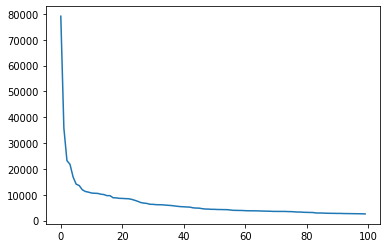

In [150]:
plt.plot(xpt,ypt)
plt.show()

以上為出現頻率圖，X軸為字詞編號，Y軸為出現頻率(由高到低)

In [151]:
freq = np.zeros(100)
for i in range(100):
    for j in range(lines):
        if index[i][0] in content[j]:
            freq[i] += 1

In [152]:
print(freq)

[78029. 31075. 22156. 18500. 16314. 13613. 12736. 11737. 11045. 10797.
 10515. 10388.  9668.  8885.  9905.  9481.  9474.  8623.  8415.  8116.
  7406.  8315.  8434.  7884.  7805.  7321.  6933.  6340.  6601.  6123.
  5756.  5761.  5827.  6075.  5979.  5839.  5664.  5502.  5406.  5362.
  4783.  5102.  5108.  4908.  4772.  4402.  4575.  4434.  4449.  4333.
  4293.  4210.  3867.  4197.  4171.  4013.  3938.  3763.  3842.  3779.
  3815.  3309.  3759.  3622.  3681.  3653.  3668.  3597.  3616.  3518.
  3521.  3440.  3168.  3311.  3393.  3252.  3376.  3122.  3044.  3098.
  2963.  2935.  2899.  2928.  2624.  2651.  2817.  2785.  2760.  2447.
  2709.  2767.  2382.  2640.  2692.  2477.  2673.  2535.  2531.  2392.]


接著套用公式 idf = log(418202/freq) 

In [153]:
idf = np.zeros(100)
for i in range(100):
    idf[i] = np.log10(lines / freq[i])

In [154]:
print(idf)

[0.72913006 1.12897497 1.27589475 1.35421438 1.40882565 1.48743226
 1.51635306 1.551829   1.57822039 1.588083   1.59957683 1.60485416
 1.63604946 1.67272867 1.62553163 1.64453196 1.64485273 1.68572772
 1.69633199 1.71204407 1.7518024  1.70152385 1.69535251 1.72463949
 1.7290132  1.7568157  1.78046491 1.81929685 1.80177637 1.83442185
 1.86126532 1.86088823 1.85594109 1.83783982 1.84475755 1.85504763
 1.86826286 1.88086552 1.88851006 1.8920593  1.94168572 1.91364565
 1.91313522 1.93048155 1.94268567 1.97773607 1.96099501 1.97459042
 1.9731237  1.98459742 1.98862522 1.99710401 2.03401193 1.99844714
 2.00114592 2.01791695 2.02611039 2.04585189 2.03682874 2.04400921
 2.03989156 2.10168934 2.04631378 2.06243766 2.05542029 2.05873643
 2.05695678 2.06544567 2.06315768 2.07509027 2.07472008 2.08482766
 2.12060093 2.10142692 2.09080225 2.10923557 2.09298367 2.12695321
 2.13794146 2.13030469 2.14965445 2.153778   2.15913789 2.15481503
 2.20242227 2.19797638 2.17159926 2.17656091 2.18047702 2.2327

In [160]:
total = 0
for i in range(lines):
    total += len(content[i])
print(total) #total為字詞總數

8301101


In [161]:
tf = np.zeros(100)
tfidf = np.zeros(100)
for i in range(100):
    tf[i] = ypt[i] / total
    tfidf[i] = tf[i] * idf[i]

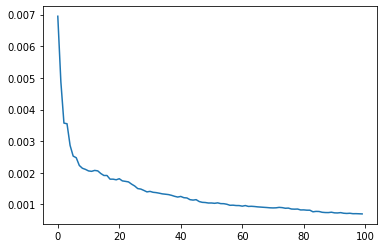

In [162]:
plt.plot(xpt,tfidf)
plt.show()

以上為tfidf權重圖，x軸為字詞編號，y軸為權重